# Chapter1
### Finance and Python Syntax
Try simple financial algorithm, namely the evaluation of  a European call option by Monte Carlo simulation.
We will consider a Black-Scholes- Merton (BSM) setup ) in which the option’s underlying risk factor follows a geometric Brownian motion.
>A European option is a version of an options contract that limits execution to its expiration date.

Parameters for evaluation
* Initial Stock index level  $S_0 = 100$
>helps investors compare current price levels with past prices to calculate market performance.
* Strike price of the European call option $K = 105$
* Time-to-maturity $T = 1 $year
>the length of time during which interest is paid. When it reaches maturity, its owner is repaid the principal.
* Constant, riskless short rate $r = 5$%
* Constant volatility $\sigma = 20$%

_Equation 1-1. Black-Scholes-Merton (1973) index level at maturity_

$\begin{equation}
\label{bsm}
  S_T = S_0 exp((r - \frac{1}{2}\sigma^2)T+\sigma \sqrt{T}z)
\end{equation}$

The following is an algorithmic description of the Monte Carlo valuation procedure:
1. Draw I (pseudo)random numbers z(i), i ∈ {1, 2, ..., I}, from the standard normal distribution.
2. Calculate all resulting index levels at maturity ST(i) for given z(i) and Equation 1-1.
3. Calculate all inner values of the option at maturity as $hT(i) = max(ST(i) – K,0)$.
4. Estimate the option present value via the Monte Carlo estimator given in Equation 1-2.

_Equation 1-2. Monte Carlo estimator for European option_

$\begin{equation}
  C_0 = exp^{-rT}\frac{1}{I}\sum{I}{} h_T(i)
\end{equation}$

Import module

In [37]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import numexpr as ne
ne.set_num_threads(4)

4

Define constant

In [8]:
S0 = 100.  # initial index level
K=105. # strike price
T=1.0  # time-to-maturity 
r=0.05  # riskless short rate
sigma = 0.2 # volatility

In [14]:
# Valuation Algorithm
I = 100000
z = np.random.standard_normal(I)
ST=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z)
# index values at maturity
hT = np.maximum(ST - K, 0) # inner values at maturity
C0=np.exp(-r*T)*sum(hT)/I # Monte Carlo estimator
# Result Output
print("Value of the European Call Option %5.3f" % C0)

Value of the European Call Option 7.942


Retrieve Google stock price data easily
First, make sure to have available all necessary libraries:
Second, retrieve the data from, say, Google itself:

In [12]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2020, 3, 31)
pd_data = web.DataReader('GOOG', 'yahoo', start, end)
pd_data.tail()

(816, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-25,1148.900024,1086.010010,1126.469971,1102.489990,4081500,1102.489990
2020-03-26,1169.969971,1093.530029,1111.800049,1161.750000,3571700,1161.750000
2020-03-27,1150.670044,1105.910034,1125.670044,1110.709961,3208500,1110.709961
2020-03-30,1151.630005,1096.479980,1125.040039,1146.819946,2574100,1146.819946
2020-03-31,1175.310059,1138.140015,1147.300049,1162.810059,2486400,1162.810059


Third, implement the necessary analytics for the volatilities:
Is it correct definition of volatility?

In [34]:
pd_data['Log_Ret'] = np.log(pd_data['Close'] / pd_data['Close'].shift(1))
pd_data['Volatility'] = pd_data['Log_Ret'].rolling(window=100,axis=0).sum()
pd_data['Volatility'].tail()

Date
2020-03-25   -0.134564
2020-03-26   -0.081272
2020-03-27   -0.136958
2020-03-30   -0.118711
2020-03-31   -0.105375
Name: Volatility, dtype: float64

Fourth, plot the results. To generate an inline plot, we use the IPython magic command %matplotlib with the option inline:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcd9641d90>,
      dtype=object)

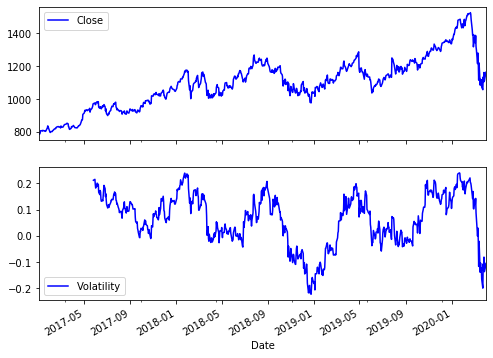

In [35]:
 %matplotlib inline
pd_data[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))